In [1]:
! pip install seaborn kneed


[notice] A new release of pip available: 22.2.2 -> 24.3.1
[notice] To update, run: pip install --upgrade pip


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans, DBSCAN
from kneed import KneeLocator
import seaborn as sns
from sklearn.decomposition import PCA
from sklearn.metrics import davies_bouldin_score

In [2]:
customers_df = pd.read_csv('dataset/Customers.csv')
transactions_df = pd.read_csv('dataset/Transactions.csv')

In [3]:
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [4]:
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
customers_df.head()

,CustomerID,CustomerName,Region,SignupDate
0,C0001,Lawrence Carroll,South America,2022-07-10
1,C0002,Elizabeth Lutz,Asia,2022-02-13
2,C0003,Michael Rivera,South America,2024-03-07
3,C0004,Kathleen Rodriguez,South America,2022-10-09
4,C0005,Laura Weber,Asia,2022-08-15


In [5]:
customers_df[customers_df['CustomerID']=="C0146"]

,CustomerID,CustomerName,Region,SignupDate
145,C0146,Brittany Harvey,Asia,2024-09-04


In [6]:
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25 12:38:23,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25 07:38:55,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26 22:55:37,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21 15:10:10,3,902.04,300.68


In [7]:
transactions_df[transactions_df['CustomerID']=="C0146"]

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
1,T00112,C0146,P067,2024-05-27 22:23:54,1,300.68,300.68
66,T00175,C0146,P053,2024-12-18 18:28:33,3,824.82,274.94
632,T00623,C0146,P066,2024-07-12 10:03:14,3,1011.66,337.22
773,T00222,C0146,P029,2024-05-24 22:54:41,1,433.64,433.64


In [8]:
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate']).dt.date
transactions_df['TransactionDate'] = transactions_df['TransactionDate'].astype('datetime64[ns]')
transactions_df.head()

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68


In [9]:
df = pd.merge(transactions_df, customers_df, on='CustomerID', how='inner')
df

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
0,T00001,C0199,P067,2024-08-25,1,300.68,300.68,Andrea Jenkins,Europe,2022-12-03
1,T00112,C0146,P067,2024-05-27,1,300.68,300.68,Brittany Harvey,Asia,2024-09-04
2,T00166,C0127,P067,2024-04-25,1,300.68,300.68,Kathryn Stevens,Europe,2024-04-04
3,T00272,C0087,P067,2024-03-26,2,601.36,300.68,Travis Campbell,South America,2024-04-11
4,T00363,C0070,P067,2024-03-21,3,902.04,300.68,Timothy Perez,Europe,2022-03-15
...,...,...,...,...,...,...,...,...,...,...
995,T00496,C0118,P037,2024-10-24,1,459.86,459.86,Jacob Holt,South America,2022-01-22
996,T00759,C0059,P037,2024-06-04,3,1379.58,459.86,Mrs. Kimberly Wright,North America,2024-04-07
997,T00922,C0018,P037,2024-04-05,4,1839.44,459.86,Tyler Haynes,North America,2024-09-21
998,T00959,C0115,P037,2024-09-29,2,919.72,459.86,Joshua Hamilton,Asia,2024-11-11


In [10]:
df[df['CustomerID']=="C0001"] 

,TransactionID,CustomerID,ProductID,TransactionDate,Quantity,TotalValue,Price,CustomerName,Region,SignupDate
135,T00015,C0001,P054,2024-01-19,2,114.60,57.30,Lawrence Carroll,South America,2022-07-10
442,T00932,C0001,P022,2024-09-17,3,412.62,137.54,Lawrence Carroll,South America,2022-07-10
546,T00085,C0001,P096,2024-04-08,2,614.94,307.47,Lawrence Carroll,South America,2022-07-10
724,T00445,C0001,P083,2024-05-07,2,911.44,455.72,Lawrence Carroll,South America,2022-07-10
776,T00436,C0001,P029,2024-11-02,3,1300.92,433.64,Lawrence Carroll,South America,2022-07-10


In [11]:
# df['DaysSinceSignup'] = (df['TransactionDate'] - df['SignupDate']).dt.days
# df.head()

In [12]:
# negative_days = df[df['DaysSinceSignup'] < 0]
# negative_days

In [13]:
df = df.groupby('CustomerID').agg(
    {
        'Quantity': 'sum',
        'TotalValue': 'sum',
        'Region' : lambda x: x.unique()[0],
        'ProductID': pd.Series.nunique,
    }).reset_index()
df.head()

,CustomerID,Quantity,TotalValue,Region,ProductID
0,C0001,12,3354.52,South America,5
1,C0002,10,1862.74,Asia,4
2,C0003,14,2725.38,South America,4
3,C0004,23,5354.88,South America,8
4,C0005,7,2034.24,Asia,3


In [14]:
lencoder = LabelEncoder()
df['Region'] = lencoder.fit_transform(df['Region'])
df.head()

,CustomerID,Quantity,TotalValue,Region,ProductID
0,C0001,12,3354.52,3,5
1,C0002,10,1862.74,0,4
2,C0003,14,2725.38,3,4
3,C0004,23,5354.88,3,8
4,C0005,7,2034.24,0,3


In [15]:
scaler = StandardScaler()
numerical_features = ['Quantity', 'TotalValue', 'Region', 'ProductID']
df[numerical_features] = scaler.fit_transform(df[numerical_features])
df.head()

,CustomerID,Quantity,TotalValue,Region,ProductID
0,C0001,-0.122033,-0.061701,1.237402,0.050047
1,C0002,-0.448000,-0.877744,-1.419897,-0.424204
2,C0003,0.203934,-0.405857,1.237402,-0.424204
3,C0004,1.670787,1.032547,1.237402,1.472798
4,C0005,-0.936951,-0.783929,-1.419897,-0.898455


In [16]:
df.drop(['CustomerID'], axis=1, inplace=True)

In [17]:
df.head()

,Quantity,TotalValue,Region,ProductID
0,-0.122033,-0.061701,1.237402,0.050047
1,-0.448000,-0.877744,-1.419897,-0.424204
2,0.203934,-0.405857,1.237402,-0.424204
3,1.670787,1.032547,1.237402,1.472798
4,-0.936951,-0.783929,-1.419897,-0.898455


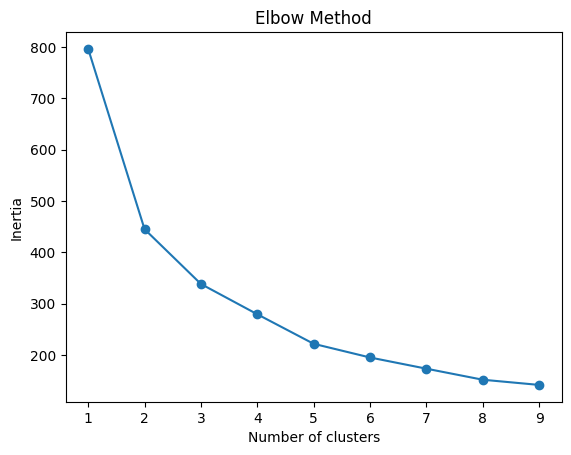

In [18]:
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df) 
    inertia.append(kmeans.inertia_)

# Plotting the Elbow method
plt.plot(range(1, 10), inertia, marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

## k=5

In [19]:
inertia = []
K_range = range(1, 10)  # Checking 1-9 clusters

for k in K_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(df)
    inertia.append(kmeans.inertia_)

In [20]:
inertia

[795.9999999999999,
 445.1217803181855,
 338.5118303949745,
 279.5653152949888,
 222.07459998881862,
 195.4430355234986,
 173.65038377964544,
 152.1541206062606,
 142.0410587616657]

In [21]:
knee = KneeLocator(K_range, inertia, curve="convex", direction="decreasing")
optimal_k = knee.knee
print(f"Optimal number of clusters: {optimal_k}")

Optimal number of clusters: 3


In [22]:
kmeans3 = KMeans(n_clusters=optimal_k, random_state=42)
df['KMeans_Cluster_3'] = kmeans3.fit_predict(df)

In [23]:
kmeans5 = KMeans(n_clusters=5, random_state=42)
df['KMeans_Cluster_5'] = kmeans5.fit_predict(df)

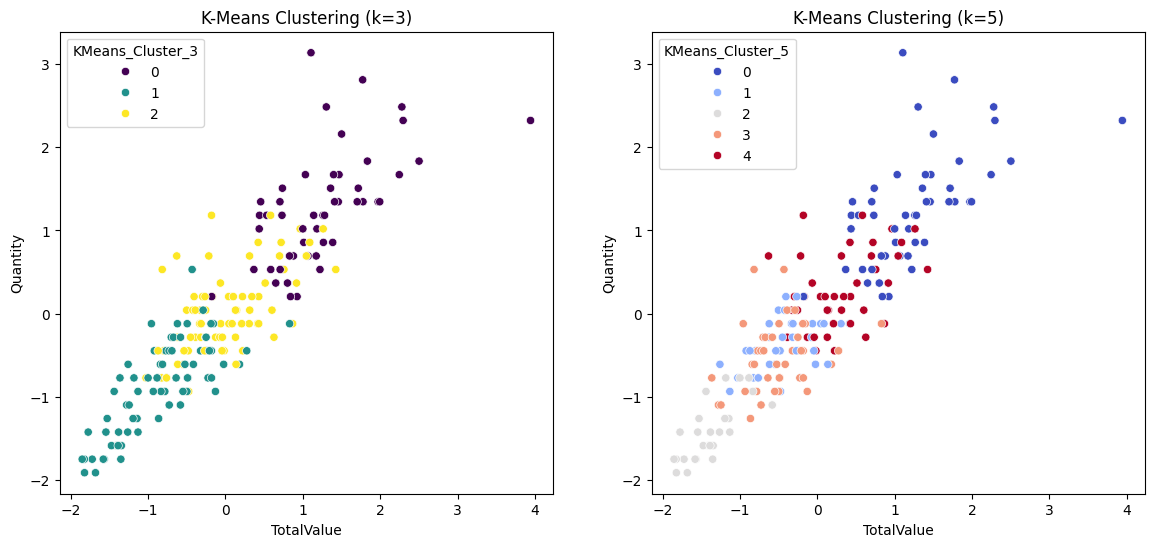

In [24]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

sns.scatterplot(x=df['TotalValue'], y=df['Quantity'], hue=df['KMeans_Cluster_3'], palette='viridis', ax=axes[0])
axes[0].set_title(f'K-Means Clustering (k={optimal_k})')

sns.scatterplot(x=df['TotalValue'], y=df['Quantity'], hue=df['KMeans_Cluster_5'], palette='coolwarm', ax=axes[1])
axes[1].set_title(f'K-Means Clustering (k={5})')

plt.show()

In [25]:
dbscan = DBSCAN(eps=1.5, min_samples=5)  # Tune eps & min_samples if needed
df['DBSCAN_Cluster'] = dbscan.fit_predict(df)

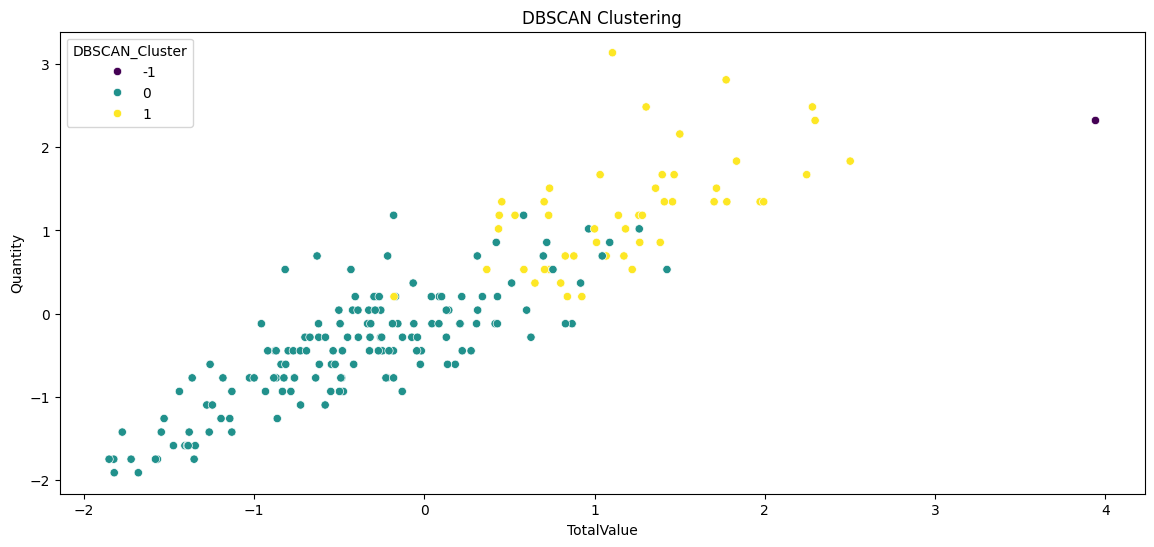

In [26]:
fig, ax = plt.subplots(figsize=(14, 6))

sns.scatterplot(x=df['TotalValue'], y=df['Quantity'], hue=df['DBSCAN_Cluster'], palette='viridis', ax=ax)
ax.set_title('DBSCAN Clustering')

plt.show()


In [27]:
db_index_kmeans3 = davies_bouldin_score(df[['TotalValue', 'Quantity']], df['KMeans_Cluster_3'])
print(f"Davies-Bouldin Index for K-Means K=3: {db_index_kmeans3:.3f}")

db_index_kmeans5 = davies_bouldin_score(df[['TotalValue', 'Quantity']], df['KMeans_Cluster_5'])
print(f"Davies-Bouldin Index for K-Means K=5: {db_index_kmeans5:.3f}")

if len(set(df['DBSCAN_Cluster'])) > 1:
    db_index_dbscan = davies_bouldin_score(df[['TotalValue', 'Quantity']], df['DBSCAN_Cluster'])
    print(f"Davies-Bouldin Index for DBSCAN: {db_index_dbscan:.3f}")
else:
    print("DBSCAN did not find meaningful clusters (all points might be noise or one cluster).")

Davies-Bouldin Index for K-Means K=3: 0.964
Davies-Bouldin Index for K-Means K=5: 2.615
Davies-Bouldin Index for DBSCAN: 0.541
